In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2, norm
from scipy import stats

In [ ]:
#Количество двоичных разрядов
p = 32

M = 2**(p-1)

a = 843314861

c = 453816693

y = 12345464

length = 12000


Базовый датчик генерирования равномерно распределенной случайнов величины в (0,1)

In [ ]:
def LFSR(p, a, c, y, length):
    M = pow(2, p - 1)
    random_sample = []
    for i in range(length):
        y = (a * y + c) % M
        random_sample.append(y / M)
    return random_sample

In [ ]:
A = LFSR(p, a, c, y, length)

In [ ]:
print(A)

[0.612951582763344, 0.029124348424375057, 0.05454228585585952, 0.4264813009649515, 0.2536821183748543, 0.6068006874993443, 0.6445388826541603, 0.44591333717107773, 0.16579841310158372, 0.9101075185462832, 0.7092386423610151, 0.3098330106586218, 0.5281120170839131, 0.4908746564760804, 0.9058733726851642, 0.5809153206646442, 0.11039975145831704, 0.2668300485238433, 0.49283302342519164, 0.8573500979691744, 0.9085355442948639, 0.46190739143639803, 0.8153834599070251, 0.36451680958271027, 0.8167316415347159, 0.9664756236597896, 0.43786861142143607, 0.3884562384337187, 0.9306391929276288, 0.8362402925267816, 0.2661469946615398, 0.019889038056135178, 0.5750582129694521, 0.14856679644435644, 0.5040126121602952, 0.17753116227686405, 0.6500069168396294, 0.9349755020812154, 0.7873502257280052, 0.37945616990327835, 0.38890043133869767, 0.4085587365552783, 0.33977500488981605, 0.23125440441071987, 0.12258888082578778, 0.20506965462118387, 0.4935065503232181, 0.09973904862999916, 0.14300484815612435

Метод суммирования при n = 12

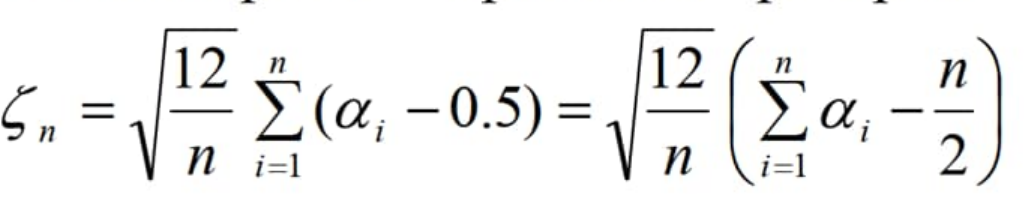

In [ ]:
zeta = math.sqrt(12/length)*(sum(A)- length/2)
zeta_12 = sum(A)-6

In [ ]:
print(zeta)
print(zeta_12)

0.41223038811318957
6007.035869471729


In [ ]:
A = LFSR(p, a, c, y, length)

In [ ]:
A_new = []
for i in range(0, 12000, 12):
  A_new.append(A[i:i+12])


In [ ]:
zeta = []
for i in range(len(A_new)):
  N = len(A_new[i])
  zeta.append(math.sqrt(12/N)*(sum(A_new[i])- N/2))

In [ ]:
print(zeta)

[-0.8309878716245294, 0.7835314935073256, 0.06761641707271338, -0.9588184738531709, -0.6446634838357568, -0.871188067831099, -0.19217754993587732, 0.17436765786260366, -0.37202966306358576, -0.13414775673300028, -0.9134526113048196, -0.15804717782884836, -1.3371830889955163, 0.5826651221141219, 0.6851633032783866, -1.200081535615027, -0.5282829413190484, 1.3282007640227675, -0.029020235873758793, 2.515183529816568, 0.9024491002783179, -0.8876531356945634, -0.6027561584487557, -0.3343955362215638, 0.1387288561090827, 0.4059286182746291, 0.003140105865895748, 0.6399752115830779, 1.200209646485746, 0.6407087212428451, 1.9137906273826957, 0.03802721854299307, 0.44248229172080755, 1.7093873685225844, -1.159745023585856, 2.1704294299706817, -0.9429248878732324, 0.46560225542634726, -0.42046977672725916, -1.4412117088213563, 0.5714539280161262, 0.2239285772666335, -0.4854490617290139, 0.4356477474793792, -0.6509779402986169, -0.7401209706440568, 0.11418919172137976, 0.2444892441853881, 1.0891

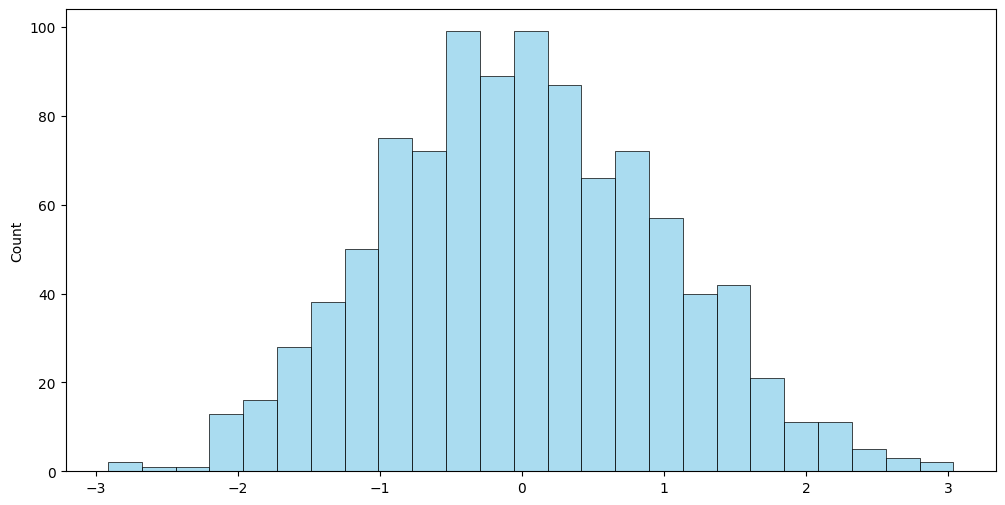

In [ ]:
plt.figure(figsize=(12, 6))

binss = 25
hist = sns.histplot(
    data=zeta,
    bins=binss,
    kde=False,
    color="skyblue",
    edgecolor="black",
    stat="count",
    alpha=0.7,
    linewidth=0.5,
)

In [ ]:
#Функция проверки на нормальное распределение
def norm_test(zeta):

  data = zeta
  n = len(data)

  num_bins = int(1 + 3.322 * np.log10(n))
  observed_freq, bin_edges = np.histogram(data, bins=num_bins)


  mu, sigma = np.mean(data), np.std(data)
  expected_freq = []
  for i in range(len(bin_edges) - 1):

    cdf_lower = norm.cdf(bin_edges[i], mu, sigma)
    cdf_upper = norm.cdf(bin_edges[i + 1], mu, sigma)
    expected_freq.append((cdf_upper - cdf_lower) * len(data))

  #Рассчитать статистику хи-квадрат
  chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)

  #Определить p-значение
  df = num_bins - 1
  p_value = 1 - chi2.cdf(chi2_stat, df)

  #Расчет критического значения хи-квадрат
  alpha = 0.05
  chi2_critical = stats.chi2.ppf(1 - alpha, df)


  print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
  print(f"Критическое значение хи-квадрат: {chi2_critical:.4f}")
  print(f"P-значение: {p_value:.4f}")

  if chi2_stat > chi2_critical:
      print("Гипотеза о нормальности отвергается (χ² расчетное > χ² критическое).")
  else:
      print("Гипотеза о нормальности не отвергается (χ² расчетное ≤ χ² критическое).")


  plt.figure(figsize=(10, 6))
  plt.hist(data, bins=num_bins, color='blue', edgecolor='black', alpha=0.7, label='Наблюдаемые данные')
  plt.title('Гистограмма данных и ожидаемое нормальное распределение')
  plt.xlabel('Значения')
  plt.ylabel('Частота')
  x_values = np.linspace(min(data), max(data), 1000)
  pdf_values = norm.pdf(x_values, mu, sigma) * len(data) * (bin_edges[1] - bin_edges[0])
  plt.plot(x_values, pdf_values, color='red', label='Ожидаемое нормальное распределение')
  plt.legend()
  plt.show()

Проверка гипотезы о нормальности

Статистика хи-квадрат: 6.4108
Критическое значение хи-квадрат: 16.9190
P-значение: 0.6982
Гипотеза о нормальности не отвергается (χ² расчетное ≤ χ² критическое).


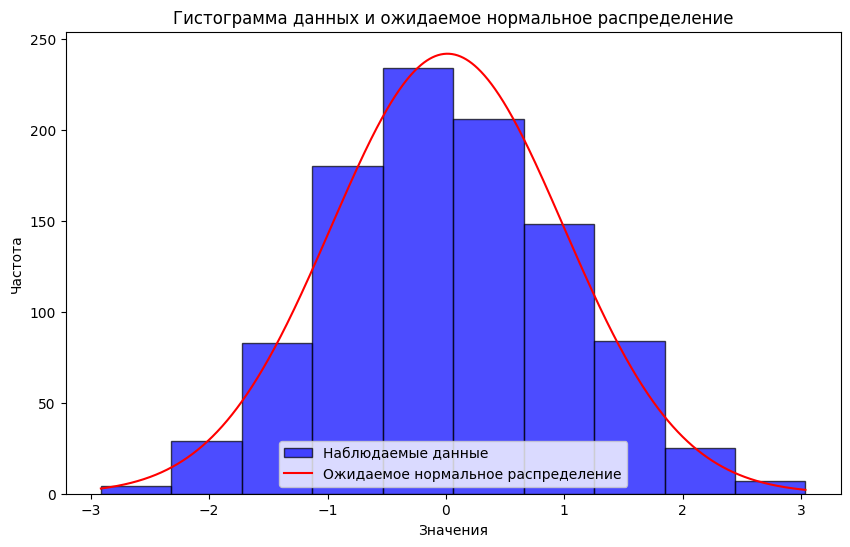

In [ ]:
norm_test(zeta)

Сравнение теоретического и выборочного среднего


In [ ]:
E = 0
sigma = 1

def mean_and_var(zeta):
    zeta_mean = sum(zeta)/len(zeta)
    sum_sq = 0
    for i in range(len(zeta)):
        sum_sq += (zeta[i] - E)**2
    zeta_var = 1/(len(zeta) - 1) * sum_sq

    print(f"Теоретическое среднее: {E:.3f}")
    print(f"Выборочное среднее: {zeta_mean:.3f}")
    print(f"Отклонение среднего: {abs(zeta_mean - E):.3f}\n")

    print(f"Теоретическая дисперсия: {sigma:.3f}")
    print(f"Выборочная дисперсия: {zeta_var:.3f}")
    print(f"Отклонение дисперсии: {abs(zeta_var - sigma):.3f}")

In [ ]:
mean_and_var(zeta)

Теоретическое среднее: 0.000
Выборочное среднее: 0.013
Отклонение среднего: 0.013

Теоретическая дисперсия: 1.000
Выборочная дисперсия: 0.966
Отклонение дисперсии: 0.034


Метод обратной функции

In [ ]:
#Количество двоичных разрядов
p = 32

M = 2**(p-1)

a = 843314861

c = 453816693

y = 12345464

length = 12000

In [ ]:
A = LFSR(p, a, c, y, length)

In [ ]:
def teta(alpha):
  return math.sqrt(-2*math.log(alpha))

In [ ]:
#(2.30753+0.27061*teta_v)/(1+0.99229*teta_v+0.04481*(teta_v**2)) - teta_v

In [ ]:
#(2.515517+0.802853*teta_v+0.010328*teta_v**2)/(1+1.432788*teta_v+0.189269*teta_v**2+0.001308*teta_v**3)-teta_v

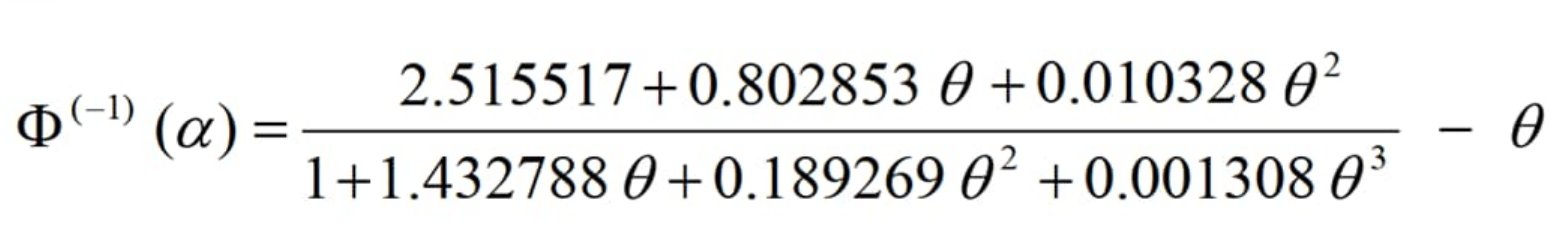

In [ ]:
def Fi(alpha):
  teta_v = teta(alpha)
  Fi = (2.515517+0.802853*teta_v+0.010328*teta_v**2)/(1+1.432788*teta_v+0.189269*teta_v**2+0.001308*teta_v**3)-teta_v
  return Fi

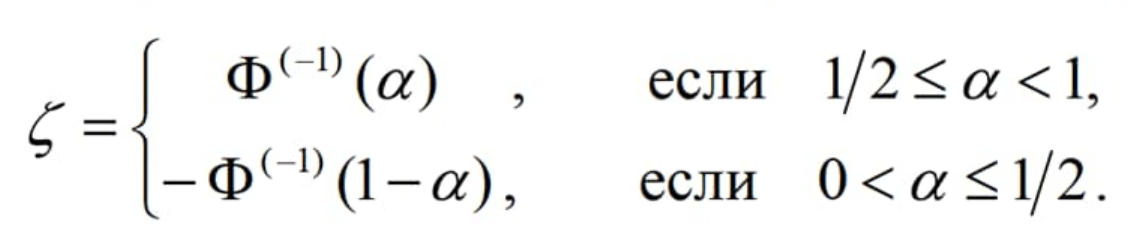

In [ ]:
def zeta_mas(A):
  zeta = []
  for i in range(len(A)):
    if 0.5 <= A[i] <= 1:
      zeta.append(Fi(A[i]))
    else:
      zeta.append(-1*Fi(1-A[i]))
  return zeta

In [ ]:
zeta = zeta_mas(A)

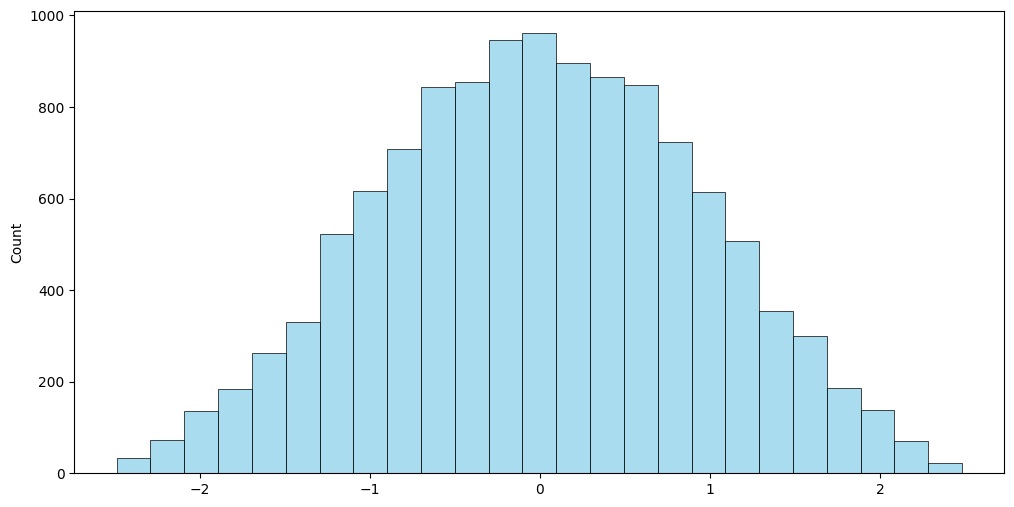

In [ ]:
plt.figure(figsize=(12, 6))

binss = 25
hist = sns.histplot(
    data=zeta,
    bins=binss,
    kde=False,
    color="skyblue",
    edgecolor="black",
    stat="count",
    alpha=0.7,
    linewidth=0.5,
)

Статистика хи-квадрат: 68.3879
Критическое значение хи-квадрат: 22.3620
P-значение: 0.0000
Гипотеза о нормальности отвергается (χ² расчетное > χ² критическое).


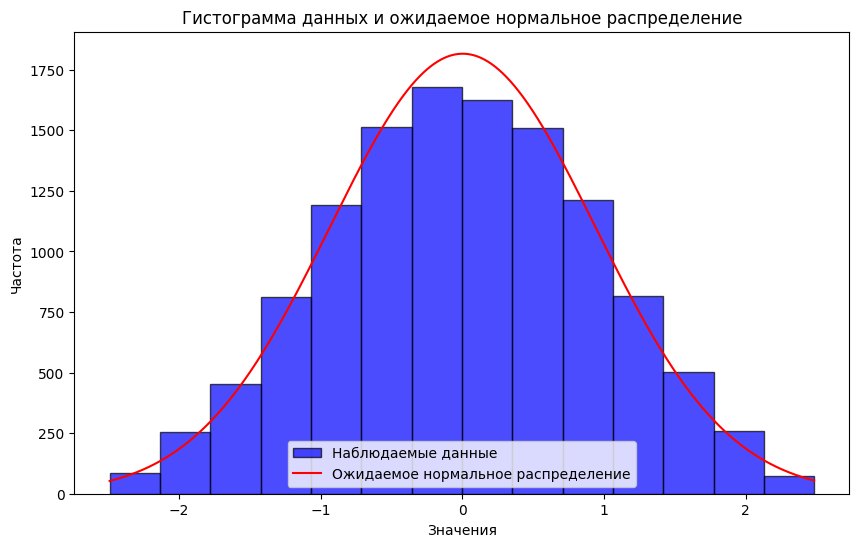

In [ ]:
norm_test(zeta)

Сравнение дисперсий и мат ожиданий

In [ ]:
mean_and_var(zeta)

Теоретическое среднее: 0.000
Выборочное среднее: 0.003
Отклонение среднего: 0.003

Теоретическая дисперсия: 1.000
Выборочная дисперсия: 0.876
Отклонение дисперсии: 0.124


Метод парного генерирования

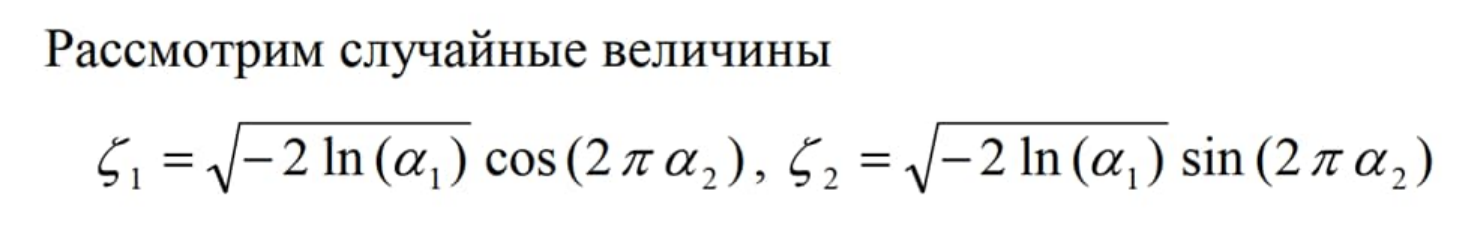

In [ ]:
pair_N = 2000

pair_func_sample = LFSR(p, a, c, y, pair_N)

alpha1 = pair_func_sample[0:1000]

alpha2 = pair_func_sample[1000:2000]

zeta_1 = []
zeta_2 = []

for i in range(1000):
    zeta_1.append(math.sqrt(-2*math.log(alpha1[i])) * math.cos(2*math.pi * alpha2[i]))
    zeta_2.append(math.sqrt(-2*math.log(alpha1[i])) * math.sin(2*math.pi * alpha2[i]))

Статистика хи-квадрат: 4.0149
Критическое значение хи-квадрат: 16.9190
P-значение: 0.9104
Гипотеза о нормальности не отвергается (χ² расчетное ≤ χ² критическое).


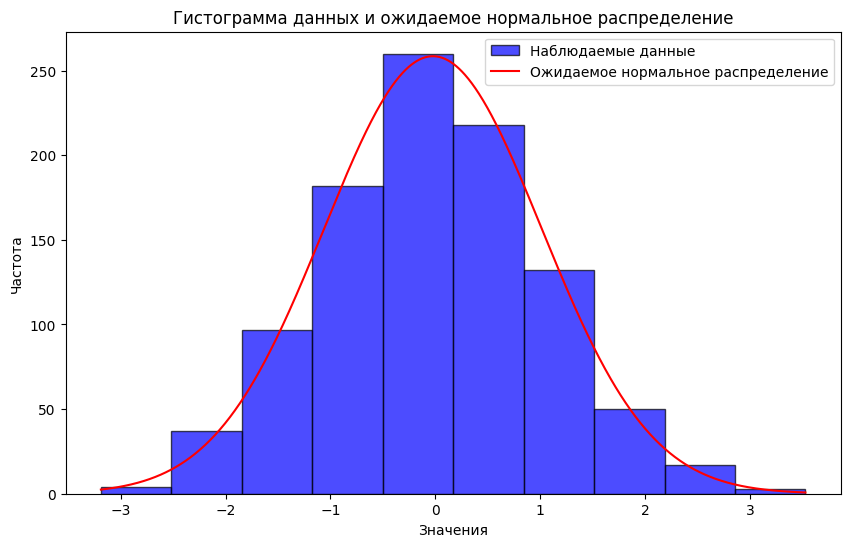

In [ ]:
norm_test(zeta_1)

Статистика хи-квадрат: 11.0746
Критическое значение хи-квадрат: 16.9190
P-значение: 0.2706
Гипотеза о нормальности не отвергается (χ² расчетное ≤ χ² критическое).


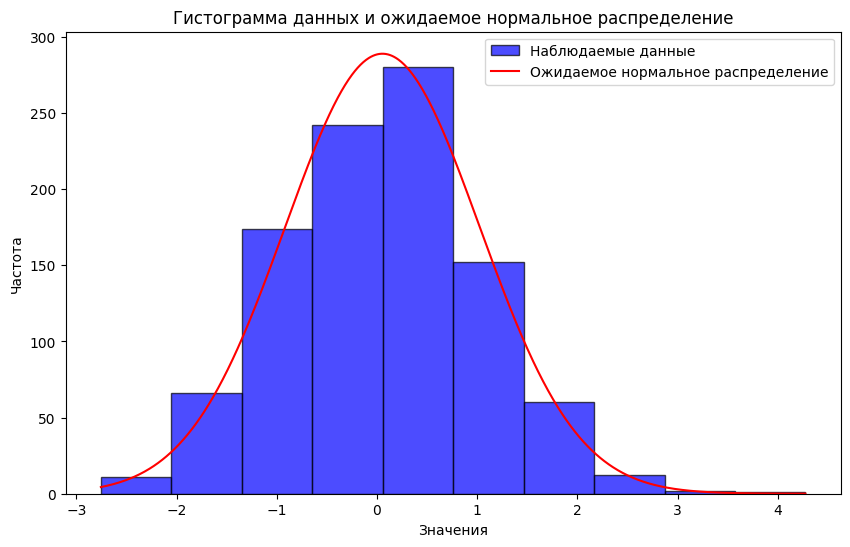

In [ ]:
norm_test(zeta_2)

Сравнение дисперсий и мат ожид

In [ ]:
mean_and_var(zeta_1)


Теоретическое среднее: 0.000
Выборочное среднее: -0.023
Отклонение среднего: 0.023

Теоретическая дисперсия: 1.000
Выборочная дисперсия: 1.077
Отклонение дисперсии: 0.077


In [ ]:
mean_and_var(zeta_2)

Теоретическое среднее: 0.000
Выборочное среднее: 0.054
Отклонение среднего: 0.054

Теоретическая дисперсия: 1.000
Выборочная дисперсия: 0.947
Отклонение дисперсии: 0.053
